# Análisis Exploratorio

## Librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import missingno as msno
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Bases de datos

In [2]:
# Importing Databases
df= pd.read_csv("/Users/manuelrodriguez/Documents/Proyectos/ML_Models/Data/rsv_limpio.csv")

In [3]:
# Visualizing the database
print("BASE DE DATOS DE RESERVACIONES")
print("==============================")
df.head()

BASE DE DATOS DE RESERVACIONES


,ID_Reserva,Fecha_hoy,h_res_fec,h_res_fec_ok,h_res_fec_okt,h_num_per,h_num_adu,h_num_men,h_num_noc,h_tot_hab,...,h_cod_reserva,h_edo,h_codigop,h_correo_e,h_nom,h_tfa_total,moneda_cve,h_ult_cam_fec,h_ult_cam_fec_ok,h_ult_cam_fec_okt
0,11,2019-11-01,1970-01-01 00:00:00.020191101,2019-11-01,2019-11-01,1.0,1,0,3.0,1,...,desconocido,emc,otro,NaN,NaN,2673.99,1,2019-11-10,2019-11-10,2019-11-10
1,15,2019-04-27,1970-01-01 00:00:00.020190427,2019-04-27,2019-04-27,1.0,1,2,3.0,1,...,otro,egr,desconocido,NaN,NaN,6377.16,1,2019-10-11,2019-10-11,2019-10-11
2,32,2019-11-14,1970-01-01 00:00:00.020191114,2019-11-14,2019-11-14,1.0,1,0,4.0,1,...,otro,emx,0,NaN,NaN,12378.24,1,2019-12-22,2019-12-22,2019-12-22
3,57,2019-04-29,1970-01-01 00:00:00.020190429,2019-04-29,2019-04-29,1.0,1,0,1.0,1,...,otro,emc,otro,NaN,NaN,1987.00,1,2019-12-06,2019-12-06,2019-12-06
4,76,2019-12-18,1970-01-01 00:00:00.020191218,2019-12-18,2019-12-18,1.0,1,0,1.0,1,...,desconocido,emx,otro,NaN,NaN,3499.00,1,2019-12-20,2019-12-20,2019-12-20


In [4]:
# Diccionario de columnas basado en el Excel "Matriz de Trazabilidad y tablas fuente"
columnas_diccionario = [
    'Descripcion',               # REGIÓN
    'Marca',                     # MARCA 
    'Franquicia',                # TIPO
    'Agencia_nombre',            # CLIENTE 
    'moneda',                    # MONEDA
    'h_fec_sda_okt',             # FECHA
    'Canal_nombre',              # CANAL
    'Empresa_nombre',            # HOTEL
    'h_nom',                     # RESERVACIÓN
    'estatus_reservaciones',     # ESTATUS DE LA RESERVACION
    'h_cod_reserva',             # N° DE CONFIRMACIÓN
    'h_fec_sda_ok',              # FECHA CONFIRMACIÓN (Dormidas)
    'h_ult_cam_fec_ok',          # FECHA CONFIRMACIÓN (Pick-Up)
    'h_edo',                     # ESTADO
    'h_codigop',                 # CÓDIGO POSTAL
    'h_fec_lld',                 # FECHA LLEGADA
    'h_fec_sda',                 # FECHA SALIDA
    'Agencia_cve',               # CLIENTE CODIGO
    'h_num_noc',                 # CUARTOS NOCHE
    'h_tot_hab',                 # HABITACIONES
    'h_tfa_total',               # INGRESOS POR HABITACIÓN
    'h_correo_e'                 # CORREO ELECTRÓNICO
]

In [5]:
# Match de columnas del diccionario y del dataframe
columnas_presentes = [col for col in columnas_diccionario if col in df.columns]
print(f"Columnas encontradas en el dataframe: {len(columnas_presentes)} de {len(columnas_diccionario)}")


Columnas encontradas en el dataframe: 13 de 22


In [6]:
# Mantener ID de columnas
columnas_id = [col for col in df.columns if "ID" in col.upper()]
print(f"Columnas ID: {len(columnas_id)}")

Columnas ID: 10


In [7]:
# Unicamente trabajar con las columnas que sí tienen un significado en el diccionario
columnas_a_usar = list(set(columnas_presentes + columnas_id))
df_analisis = df[columnas_a_usar]

In [8]:
for col in columnas_id:
    # Primero verificamos si la columna es numérica
    if pd.api.types.is_numeric_dtype(df_analisis[col]):
        # Si es numérica, la convertimos a string y luego a object
        df_analisis[col] = df_analisis[col].astype(str)
    # Aseguramos que sea tipo object
    df_analisis[col] = df_analisis[col].astype('object')
    print(f"Columna {col} convertida a tipo object")

Columna ID_Reserva convertida a tipo object
Columna ID_Programa convertida a tipo object
Columna ID_Paquete convertida a tipo object
Columna ID_Segmento_Comp convertida a tipo object
Columna ID_Agencia convertida a tipo object
Columna ID_empresa convertida a tipo object
Columna ID_Tipo_Habitacion convertida a tipo object
Columna ID_canal convertida a tipo object
Columna ID_Pais_Origen convertida a tipo object
Columna ID_estatus_reservaciones convertida a tipo object


In [9]:
# Columnas numericas
columnas_numericas = ['h_num_noc', 'h_tot_hab', 'h_tfa_total']
for col in columnas_numericas:
    if col in df_analisis.columns:
        try:
            # Intentamos convertir a float (maneja valores decimales si existen)
            df_analisis[col] = pd.to_numeric(df_analisis[col], errors='coerce')
            # Rellenamos valores nulos que pudieran surgir de la conversión
            if df_analisis[col].isna().any():
                print(f"Advertencia: Se encontraron valores no numéricos en {col} que se convirtieron a NaN")
            print(f"Columna {col} convertida a tipo numérico")
        except Exception as e:
            print(f"Error al convertir {col} a numérico: {e}")

Columna h_num_noc convertida a tipo numérico
Columna h_tot_hab convertida a tipo numérico
Columna h_tfa_total convertida a tipo numérico


In [10]:
# Valores nulos
print("\nVALORES NULOS EXISTENTES")
print("===========================")
for columna in df_analisis.columns:
    if df_analisis[columna].isnull().sum() > 0:
        print(f"{columna}: {df_analisis[columna].isnull().sum()} valores nulos")
print("===========================")
print("Total de filas:", df_analisis.shape[0])




VALORES NULOS EXISTENTES
h_correo_e: 5575 valores nulos
h_nom: 5575 valores nulos
Total de filas: 5575


In [11]:
# Valores duplicados
print("\nCantidad de filas duplicadas:", df_analisis.duplicated().sum())


Cantidad de filas duplicadas: 0


In [12]:
columnas_con_nulos = df_analisis.columns[df_analisis.isna().any()].tolist()
print(f"\nColumnas con valores nulos: {len(columnas_con_nulos)}")
for col in columnas_con_nulos:
    null_count = df_analisis[col].isna().sum()
    null_percentage = (null_count / len(df_analisis)) * 100
    print(f"  - {col}: {null_count} valores nulos ({null_percentage:.2f}%)")

if columnas_con_nulos:
    df_analisis = df_analisis.drop(columns=columnas_con_nulos)
    print(f"\nSe eliminaron {len(columnas_con_nulos)} columnas con valores nulos.")
else:
    print("\nNo se encontraron columnas con valores nulos para eliminar.")

print(f"Total de columnas después de eliminar columnas nulas: {df_analisis.shape[1]}")



Columnas con valores nulos: 2
  - h_correo_e: 5575 valores nulos (100.00%)
  - h_nom: 5575 valores nulos (100.00%)

Se eliminaron 2 columnas con valores nulos.
Total de columnas después de eliminar columnas nulas: 21


# Exploración

In [13]:
# Dimensiones
print("DIMENSIONES")
print("===========")
print("(filas, columnas):", df_analisis.shape)

DIMENSIONES
(filas, columnas): (5575, 21)


In [14]:
# Tipos de datos
print("\nTIPOS DE DATOS")
print("=================")
print(df_analisis.dtypes)


TIPOS DE DATOS
h_cod_reserva                object
h_fec_sda_ok                 object
h_tfa_total                 float64
h_fec_sda_okt                object
ID_Segmento_Comp             object
ID_Tipo_Habitacion           object
h_edo                        object
ID_Pais_Origen               object
ID_Paquete                   object
h_ult_cam_fec_ok             object
ID_empresa                   object
ID_canal                     object
ID_estatus_reservaciones     object
h_fec_sda                    object
h_tot_hab                     int64
h_num_noc                   float64
h_codigop                    object
ID_Agencia                   object
h_fec_lld                    object
ID_Programa                  object
ID_Reserva                   object
dtype: object


In [15]:
# Separacion por tipos de datos
columnas_object = df_analisis.select_dtypes(include=['object']).columns.tolist()
columnas_numericas_reales = df_analisis.select_dtypes(include=['int64', 'float64']).columns.tolist()
columnas_datetime = df_analisis.select_dtypes(include=['datetime64']).columns.tolist()

print("TIPOS DE DATOS")
print("===============")
print(f"\nColumnas categóricas (object): {len(columnas_object)}")
print(f"Columnas numéricas: {len(columnas_numericas_reales)}")
print(f"Columnas de fecha: {len(columnas_datetime)}")

TIPOS DE DATOS

Columnas categóricas (object): 18
Columnas numéricas: 3
Columnas de fecha: 0


In [16]:
# Estadísticas básicas
print("\nRESUMEN ESTADISTICO")
print("======================")
df_analisis.describe()


RESUMEN ESTADISTICO


,h_tfa_total,h_tot_hab,h_num_noc
count,5575.000000,5575.0,5575.000000
mean,6392.694735,1.0,3.361973
std,4489.151453,0.0,1.743898
min,0.000000,1.0,1.000000
25%,2999.000000,1.0,2.000000
50%,5961.000000,1.0,3.000000
75%,8970.000000,1.0,4.000000
max,17926.500000,1.0,7.000000


In [17]:
# Ver base de datos
df_analisis.head()

,h_cod_reserva,h_fec_sda_ok,h_tfa_total,h_fec_sda_okt,ID_Segmento_Comp,ID_Tipo_Habitacion,h_edo,ID_Pais_Origen,ID_Paquete,h_ult_cam_fec_ok,...,ID_canal,ID_estatus_reservaciones,h_fec_sda,h_tot_hab,h_num_noc,h_codigop,ID_Agencia,h_fec_lld,ID_Programa,ID_Reserva
0,desconocido,2019-11-10,2673.99,2019-11-10,14,23,emc,157,2,2019-11-10,...,1,9,1970-01-01 00:00:00.020191110,1,3.0,otro,112,1970-01-01 00:00:00.020191107,1,11
1,otro,2019-10-23,6377.16,2019-10-23,5,19,egr,157,1,2019-10-11,...,13,2,1970-01-01 00:00:00.020191023,1,3.0,desconocido,14,1970-01-01 00:00:00.020191020,1,15
2,otro,2019-12-22,12378.24,2019-12-22,5,19,emx,157,1,2019-12-22,...,1,9,1970-01-01 00:00:00.020191222,1,4.0,0,14,1970-01-01 00:00:00.020191218,1,32
3,otro,2019-12-06,1987.00,2019-12-06,17,6,emc,157,1,2019-12-06,...,1,9,1970-01-01 00:00:00.020191206,1,1.0,otro,99,1970-01-01 00:00:00.020191205,1,57
4,desconocido,2019-12-20,3499.00,2019-12-20,12,6,emx,157,2,2019-12-20,...,4,3,1970-01-01 00:00:00.020191220,1,1.0,otro,120,1970-01-01 00:00:00.020191219,1,76


# Limpieza de datos

In [18]:
# Dimension del df
print("DIMENSIONES DEL DATAFRAME")
print("=========================")
print(f"Filas: {df_analisis.shape[0]}, Columnas: {df_analisis.shape[1]}")

DIMENSIONES DEL DATAFRAME
Filas: 5575, Columnas: 21


In [19]:
# Info del dataframe
print("INFORMACION DEL DATAFRAME")
print("=========================")
df_analisis.info()

INFORMACION DEL DATAFRAME
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5575 entries, 0 to 5574
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   h_cod_reserva             5575 non-null   object 
 1   h_fec_sda_ok              5575 non-null   object 
 2   h_tfa_total               5575 non-null   float64
 3   h_fec_sda_okt             5575 non-null   object 
 4   ID_Segmento_Comp          5575 non-null   object 
 5   ID_Tipo_Habitacion        5575 non-null   object 
 6   h_edo                     5575 non-null   object 
 7   ID_Pais_Origen            5575 non-null   object 
 8   ID_Paquete                5575 non-null   object 
 9   h_ult_cam_fec_ok          5575 non-null   object 
 10  ID_empresa                5575 non-null   object 
 11  ID_canal                  5575 non-null   object 
 12  ID_estatus_reservaciones  5575 non-null   object 
 13  h_fec_sda                 5575 non-nu

In [20]:
# Estadisticas descriptivas
print("ESTADISTICAS DESCRIPTIVAS")
print("==========================")
df_analisis.describe().T

ESTADISTICAS DESCRIPTIVAS


,count,mean,std,min,25%,50%,75%,max
h_tfa_total,5575.0,6392.694735,4489.151453,0.0,2999.0,5961.0,8970.0,17926.5
h_tot_hab,5575.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
h_num_noc,5575.0,3.361973,1.743898,1.0,2.0,3.0,4.0,7.0


In [21]:
# Tipos de datos
df_analisis.dtypes.value_counts()

object     18
float64     2
int64       1
dtype: int64

In [22]:
# Conversion de fechas a datetime
columnas_fecha = [col for col in columnas_presentes if 'fec' in col.lower()]
for col in columnas_fecha:
    try:
        df_analisis[col] = pd.to_datetime(df_analisis[col], errors='coerce')
        print(f"Columna {col} convertida a datetime")
    except:
        print(f"No se pudo convertir la columna {col} a datetime")

Columna h_fec_sda_okt convertida a datetime
Columna h_fec_sda_ok convertida a datetime
Columna h_ult_cam_fec_ok convertida a datetime
Columna h_fec_lld convertida a datetime
Columna h_fec_sda convertida a datetime


In [23]:
df_analisis.head()

,h_cod_reserva,h_fec_sda_ok,h_tfa_total,h_fec_sda_okt,ID_Segmento_Comp,ID_Tipo_Habitacion,h_edo,ID_Pais_Origen,ID_Paquete,h_ult_cam_fec_ok,...,ID_canal,ID_estatus_reservaciones,h_fec_sda,h_tot_hab,h_num_noc,h_codigop,ID_Agencia,h_fec_lld,ID_Programa,ID_Reserva
0,desconocido,2019-11-10,2673.99,2019-11-10,14,23,emc,157,2,2019-11-10,...,1,9,1970-01-01 00:00:00.020191110,1,3.0,otro,112,1970-01-01 00:00:00.020191107,1,11
1,otro,2019-10-23,6377.16,2019-10-23,5,19,egr,157,1,2019-10-11,...,13,2,1970-01-01 00:00:00.020191023,1,3.0,desconocido,14,1970-01-01 00:00:00.020191020,1,15
2,otro,2019-12-22,12378.24,2019-12-22,5,19,emx,157,1,2019-12-22,...,1,9,1970-01-01 00:00:00.020191222,1,4.0,0,14,1970-01-01 00:00:00.020191218,1,32
3,otro,2019-12-06,1987.00,2019-12-06,17,6,emc,157,1,2019-12-06,...,1,9,1970-01-01 00:00:00.020191206,1,1.0,otro,99,1970-01-01 00:00:00.020191205,1,57
4,desconocido,2019-12-20,3499.00,2019-12-20,12,6,emx,157,2,2019-12-20,...,4,3,1970-01-01 00:00:00.020191220,1,1.0,otro,120,1970-01-01 00:00:00.020191219,1,76


# Análisis descriptivo

## Análisis de variables numéricas

In [24]:
# Estadísticas descriptivas
stats_numericas = df_analisis[columnas_numericas_reales].describe().T
stats_numericas['rango'] = stats_numericas['max'] - stats_numericas['min']
stats_numericas['coef_variacion'] = stats_numericas['std'] / stats_numericas['mean'] * 100
print(stats_numericas.round(2))

              count     mean      std  min     25%     50%     75%      max  \
h_tfa_total  5575.0  6392.69  4489.15  0.0  2999.0  5961.0  8970.0  17926.5   
h_tot_hab    5575.0     1.00     0.00  1.0     1.0     1.0     1.0      1.0   
h_num_noc    5575.0     3.36     1.74  1.0     2.0     3.0     4.0      7.0   

               rango  coef_variacion  
h_tfa_total  17926.5           70.22  
h_tot_hab        0.0            0.00  
h_num_noc        6.0           51.87  


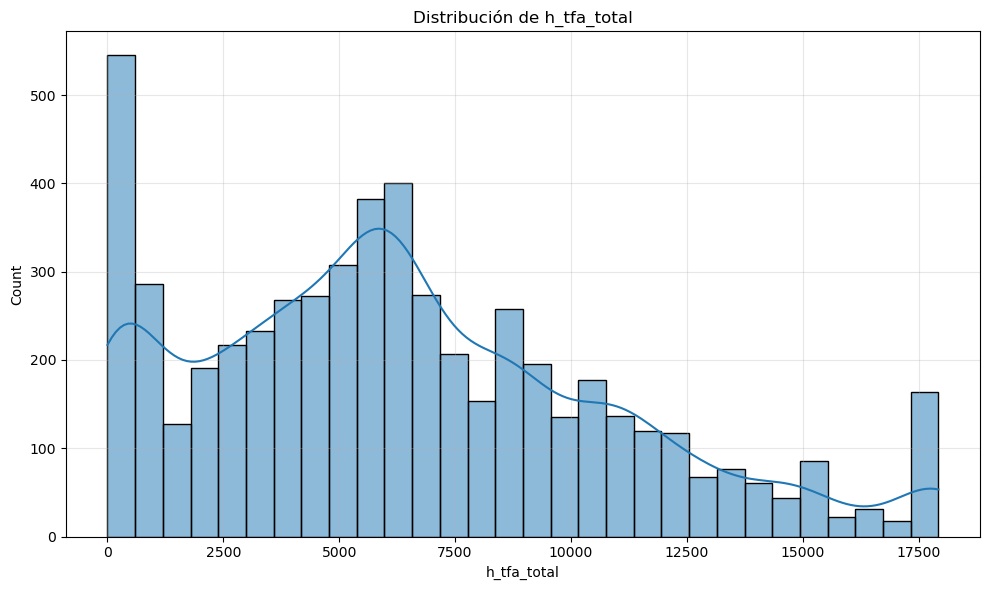

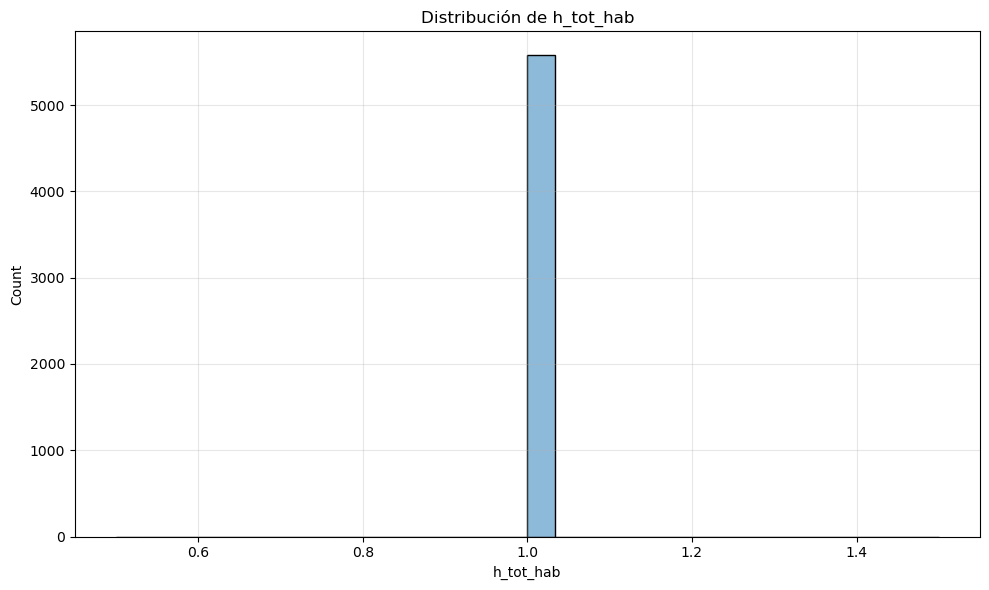

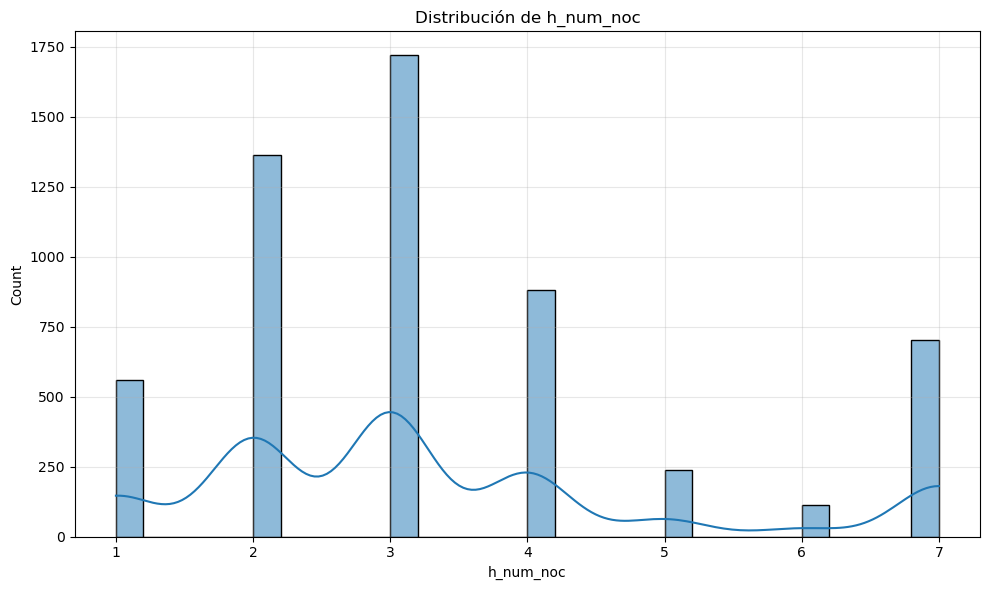

In [25]:
# Histogramas para variables numéricas
for col in columnas_numericas_reales:
    plt.figure(figsize=(10, 6))
    sns.histplot(df_analisis[col], kde=True, bins=30)
    plt.title(f'Distribución de {col}')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

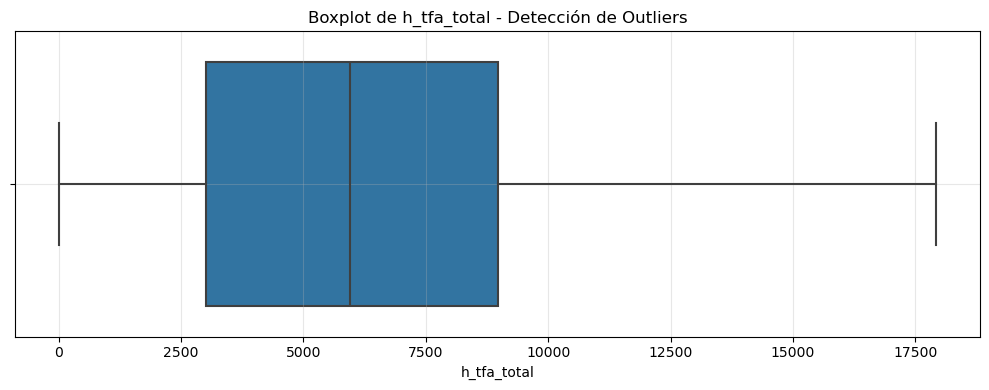

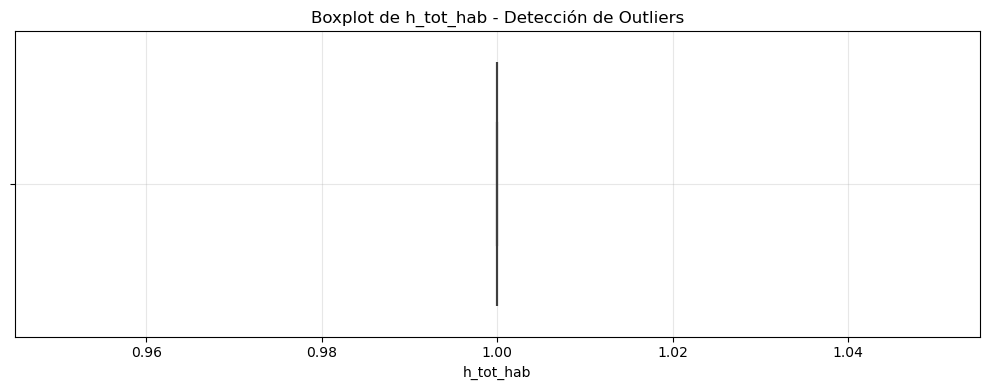

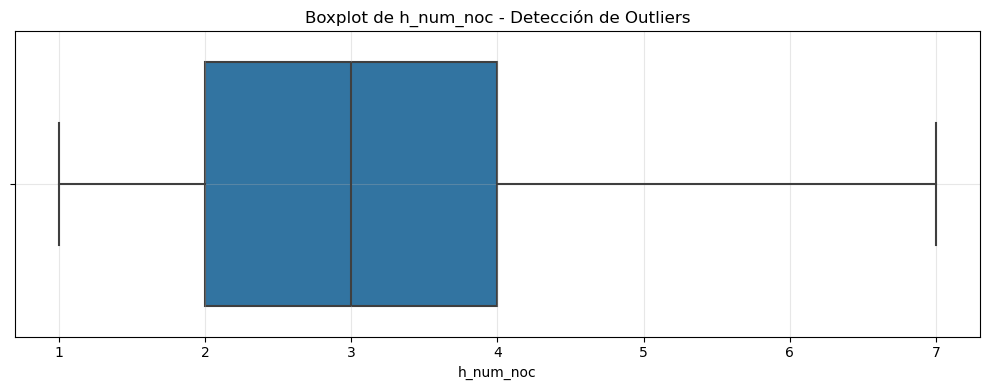

In [26]:
# Boxplot para detectar outliers
for col in columnas_numericas_reales:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df_analisis[col])
    plt.title(f'Boxplot de {col} - Detección de Outliers')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

In [27]:
# Estadísticas sobre outliers    
for col in columnas_numericas_reales:
    Q1 = df_analisis[col].quantile(0.25)
    Q3 = df_analisis[col].quantile(0.75)
    IQR = Q3 - Q1
    outlier_threshold_lower = Q1 - 1.5 * IQR
    outlier_threshold_upper = Q3 + 1.5 * IQR
    outliers = df_analisis[(df_analisis[col] < outlier_threshold_lower) | 
                            (df_analisis[col] > outlier_threshold_upper)][col]
    print(f"\nEstadísticas de {col}:")
    print(f"  - Rango: {df_analisis[col].min()} a {df_analisis[col].max()}")
    print(f"  - Media: {df_analisis[col].mean():.2f}")
    print(f"  - Mediana: {df_analisis[col].median():.2f}")
    print(f"  - Outliers detectados: {len(outliers)} ({len(outliers)/len(df_analisis)*100:.2f}%)")
    if len(outliers) > 0:
        print(f"  - Rango de outliers: {outliers.min():.2f} a {outliers.max():.2f}")


Estadísticas de h_tfa_total:
  - Rango: 0.0 a 17926.5
  - Media: 6392.69
  - Mediana: 5961.00
  - Outliers detectados: 0 (0.00%)

Estadísticas de h_tot_hab:
  - Rango: 1 a 1
  - Media: 1.00
  - Mediana: 1.00
  - Outliers detectados: 0 (0.00%)

Estadísticas de h_num_noc:
  - Rango: 1.0 a 7.0
  - Media: 3.36
  - Mediana: 3.00
  - Outliers detectados: 0 (0.00%)


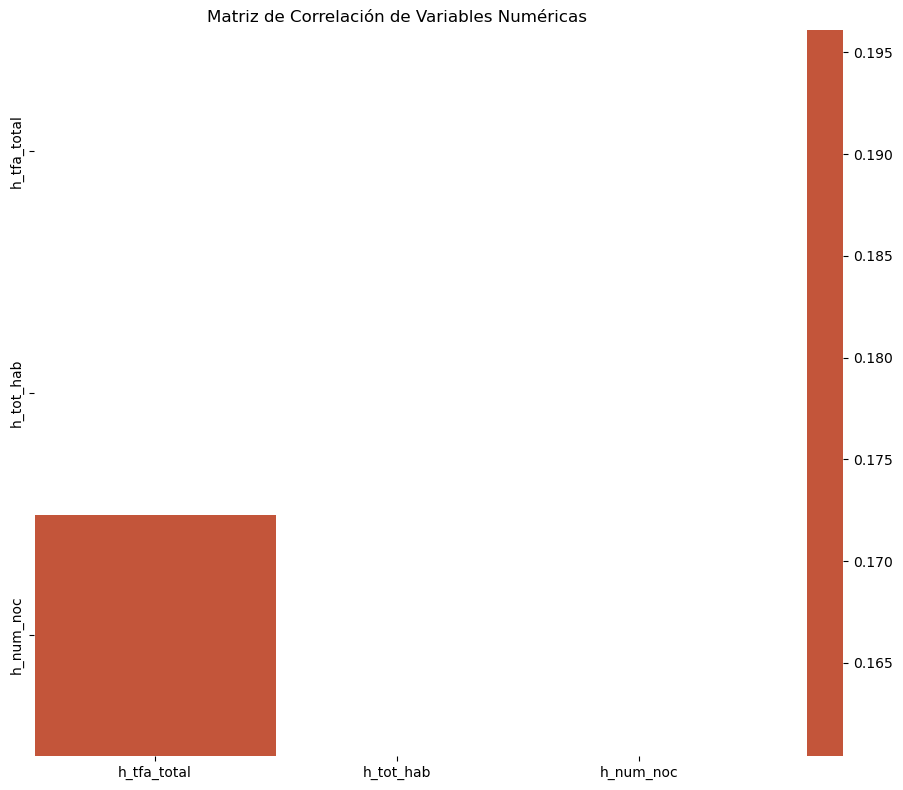

In [28]:
# Correlación entre variables numéricas
corr_matrix = df_analisis[columnas_numericas_reales].corr()

plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, annot=True, fmt='.2f',
            linewidths=0.5, center=0, square=True)
plt.title('Matriz de Correlación de Variables Numéricas')
plt.tight_layout()
plt.show()

## Análisis de variables categóricas


Distribución de ID_Agencia:
  - Valores únicos: 99
  - Muchos valores únicos (99). Mostrando los 10 más frecuentes:
86     511
112    471
99     411
14     389
116    352
32     236
89     219
19     193
43     188
33     164
Name: ID_Agencia, dtype: int64


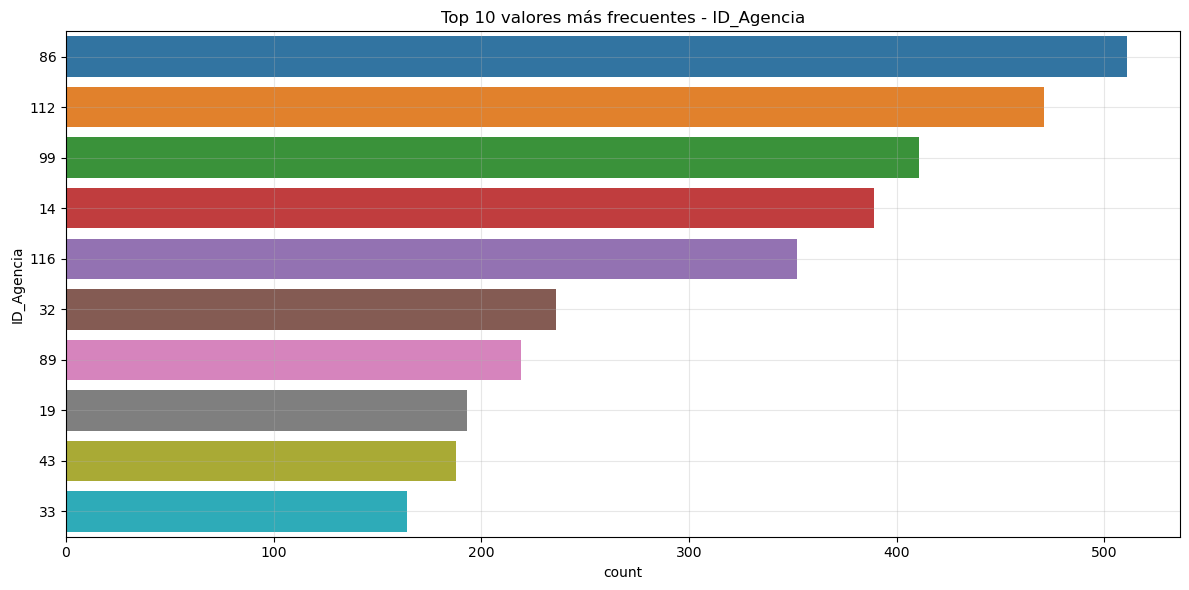


Distribución de ID_Programa:
  - Valores únicos: 1
  - Muchos valores únicos (1). Mostrando los 10 más frecuentes:
1    5575
Name: ID_Programa, dtype: int64


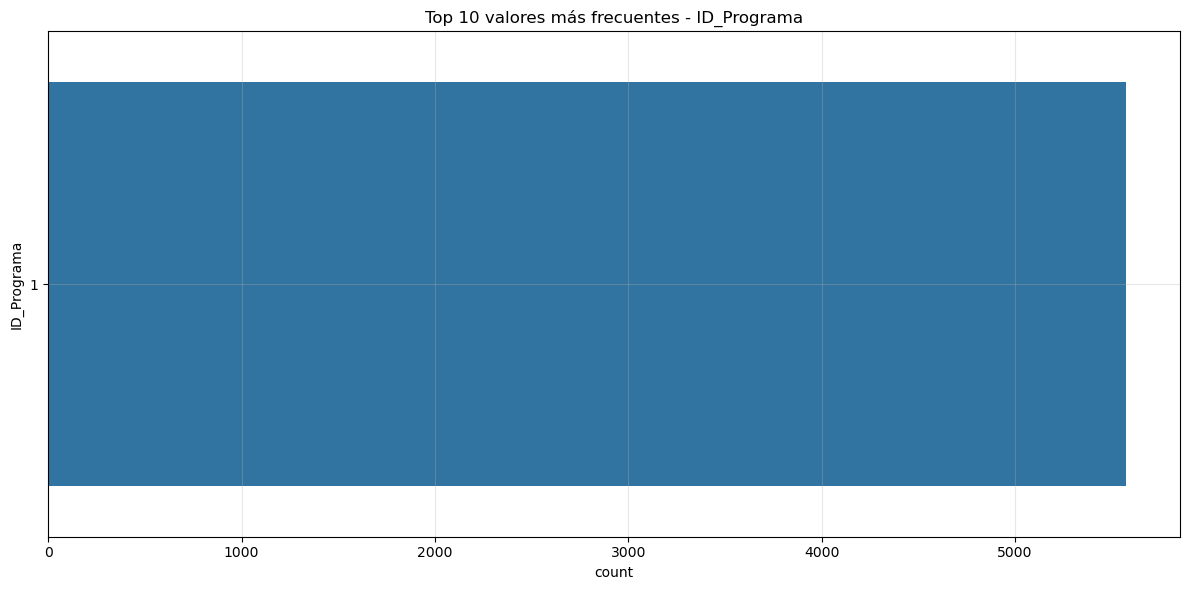


Distribución de ID_empresa:
  - Valores únicos: 1
  - Muchos valores únicos (1). Mostrando los 10 más frecuentes:
1    5575
Name: ID_empresa, dtype: int64


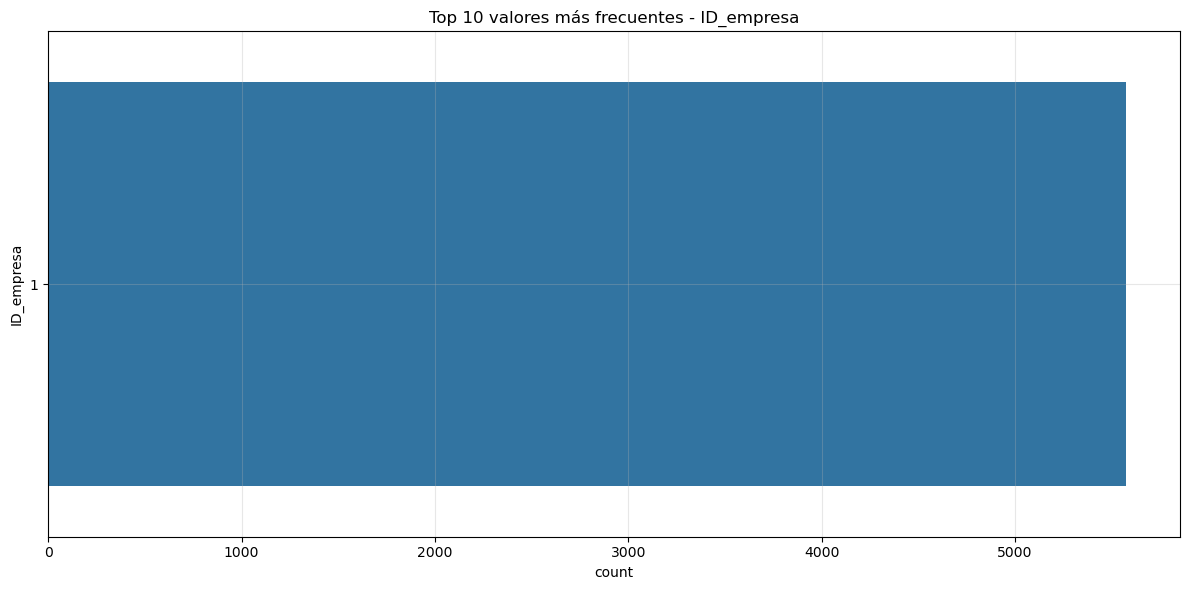


Distribución de ID_Pais_Origen:
  - Valores únicos: 4
  - Muchos valores únicos (4). Mostrando los 10 más frecuentes:
157    5523
0        37
232       9
38        6
Name: ID_Pais_Origen, dtype: int64


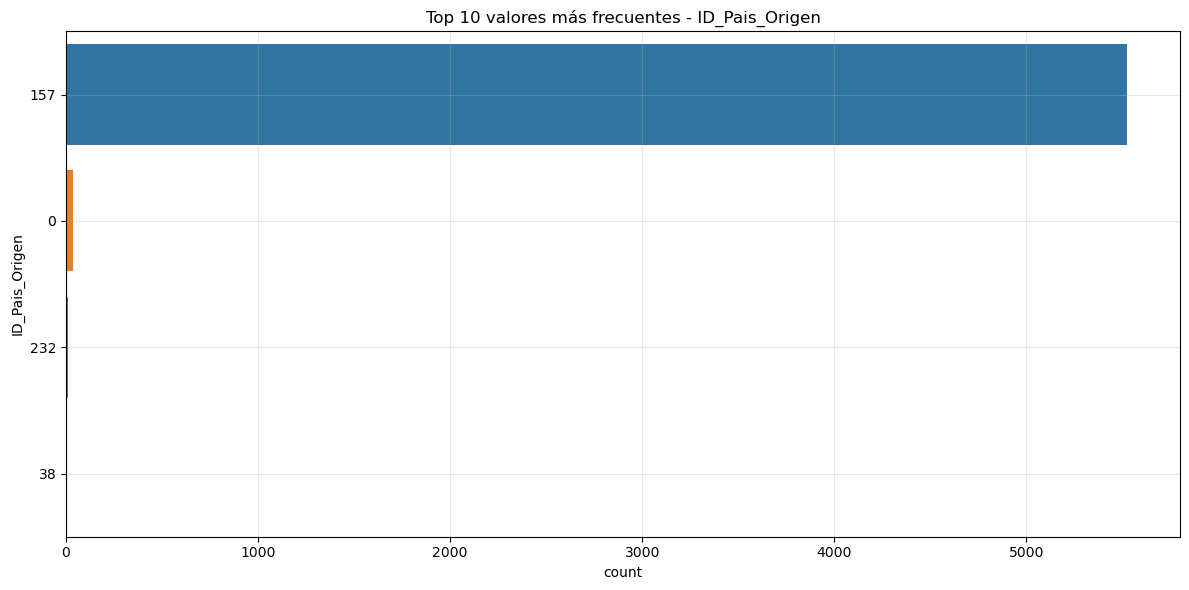


Distribución de ID_Paquete:
  - Valores únicos: 4
  - Muchos valores únicos (4). Mostrando los 10 más frecuentes:
1    3312
2    2256
5       6
3       1
Name: ID_Paquete, dtype: int64


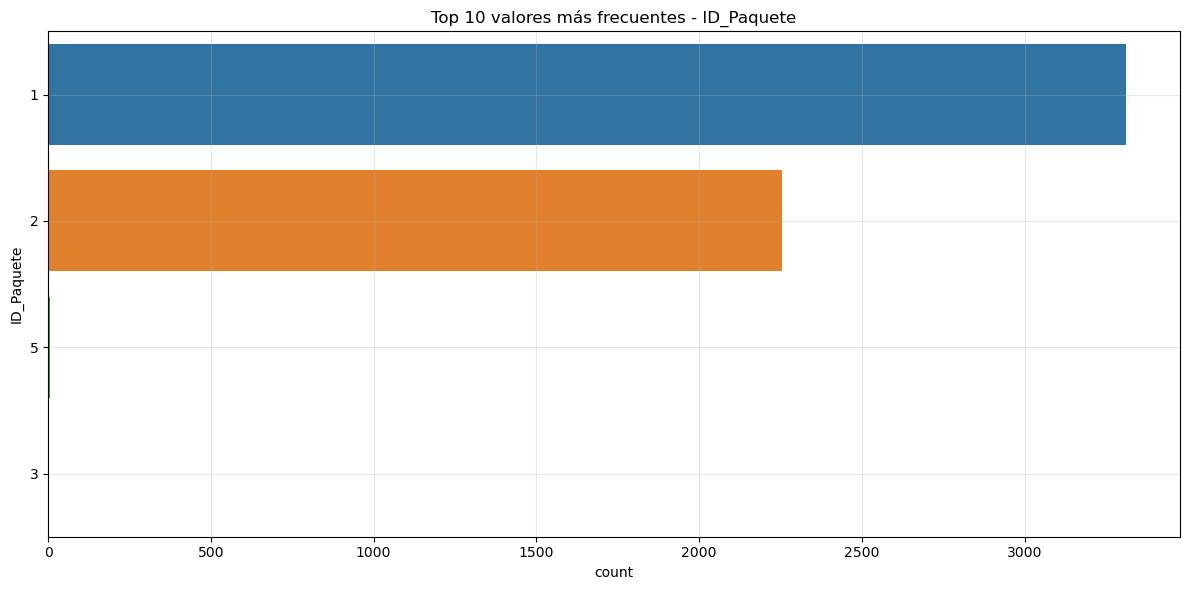


Distribución de ID_Reserva:
  - Valores únicos: 5575
  - Muchos valores únicos (5575). Mostrando los 10 más frecuentes:
11       1
71220    1
71441    1
71423    1
71391    1
71362    1
71343    1
71275    1
71264    1
71263    1
Name: ID_Reserva, dtype: int64


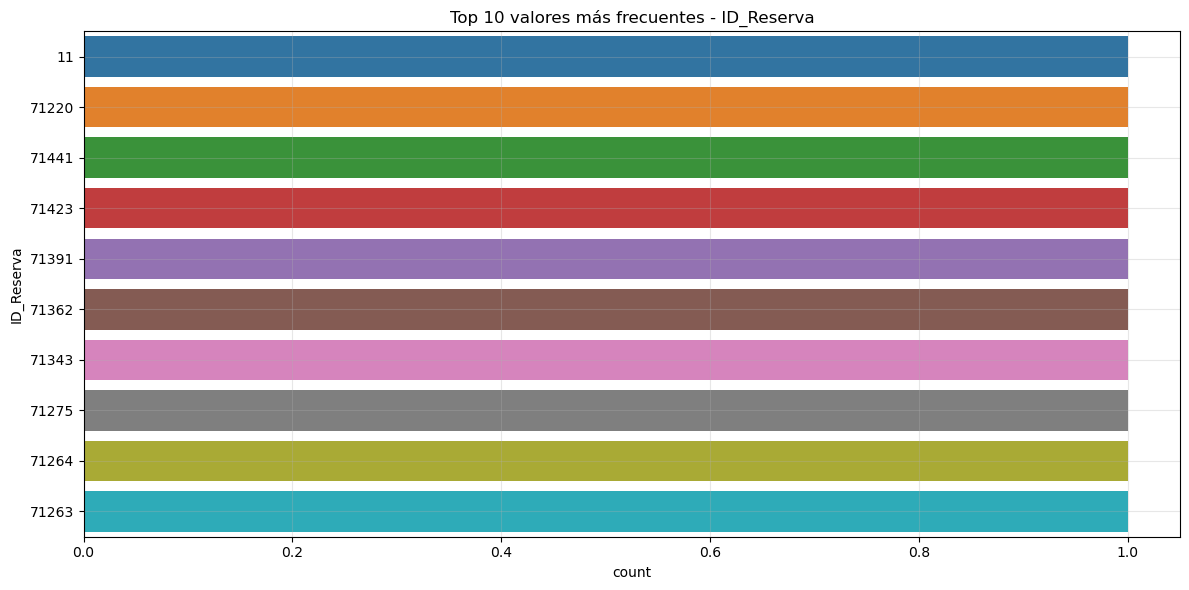


Distribución de ID_Segmento_Comp:
  - Valores únicos: 18
  - Muchos valores únicos (18). Mostrando los 10 más frecuentes:
17    1022
12    1008
5      870
16     581
14     530
18     361
1      283
8      178
9      164
13     134
Name: ID_Segmento_Comp, dtype: int64


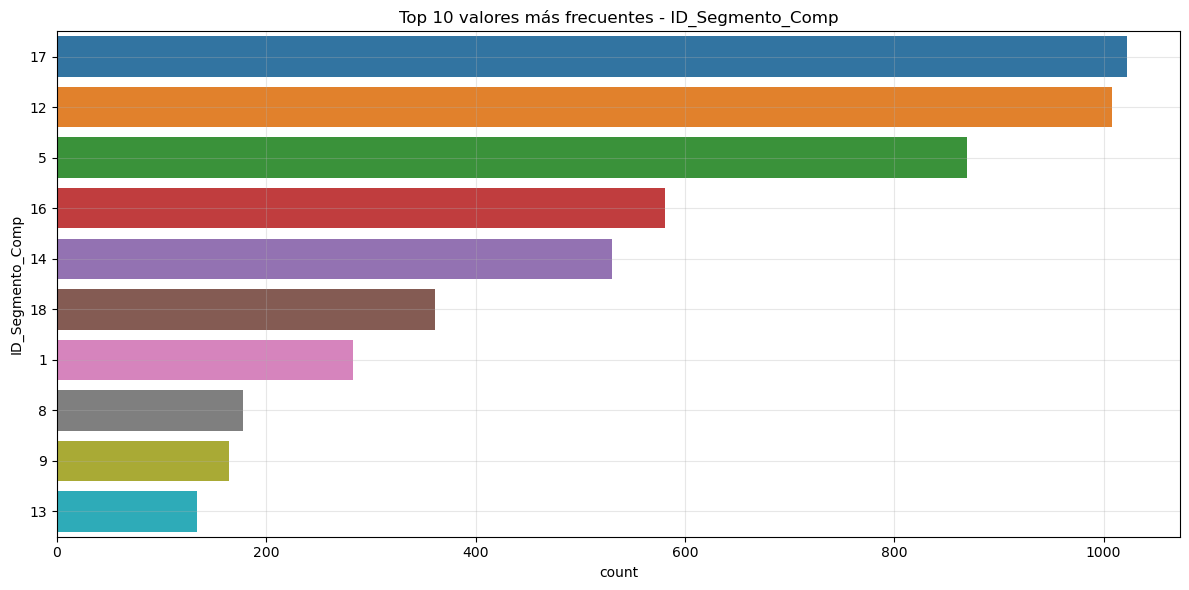


Distribución de ID_Tipo_Habitacion:
  - Valores únicos: 26
  - Muchos valores únicos (26). Mostrando los 10 más frecuentes:
4     1240
6      944
13     786
19     721
17     700
25     240
5      166
7      140
26     126
12      89
Name: ID_Tipo_Habitacion, dtype: int64


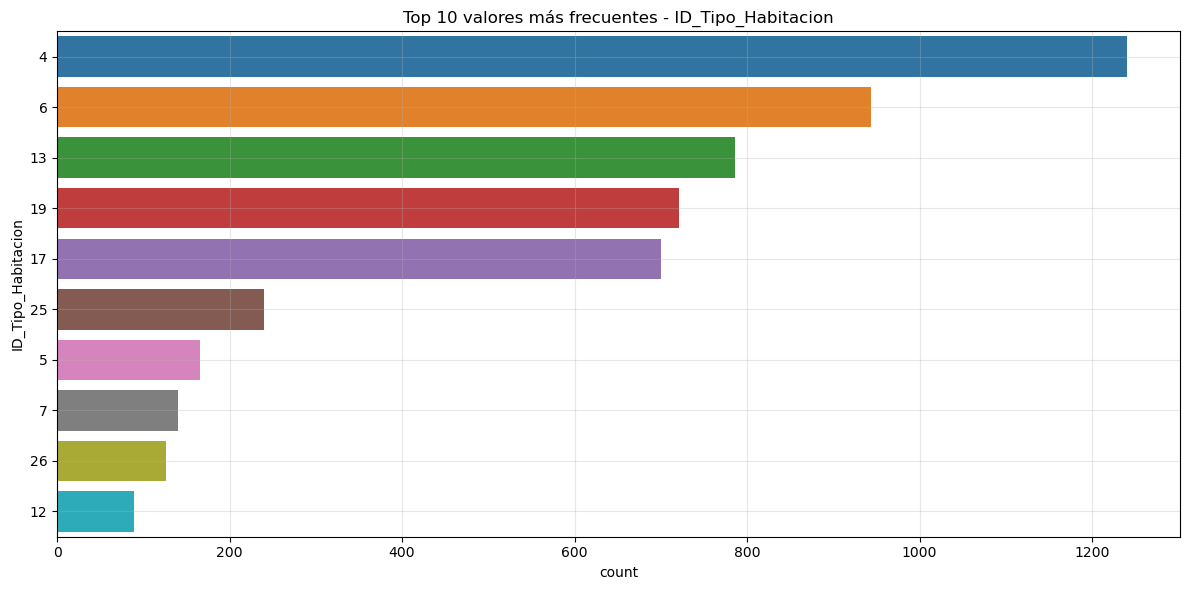


Distribución de ID_canal:
  - Valores únicos: 12
  - Muchos valores únicos (12). Mostrando los 10 más frecuentes:
1     2743
4     1882
10     386
7      248
0      106
8       93
13      59
5       30
9       20
11       5
Name: ID_canal, dtype: int64


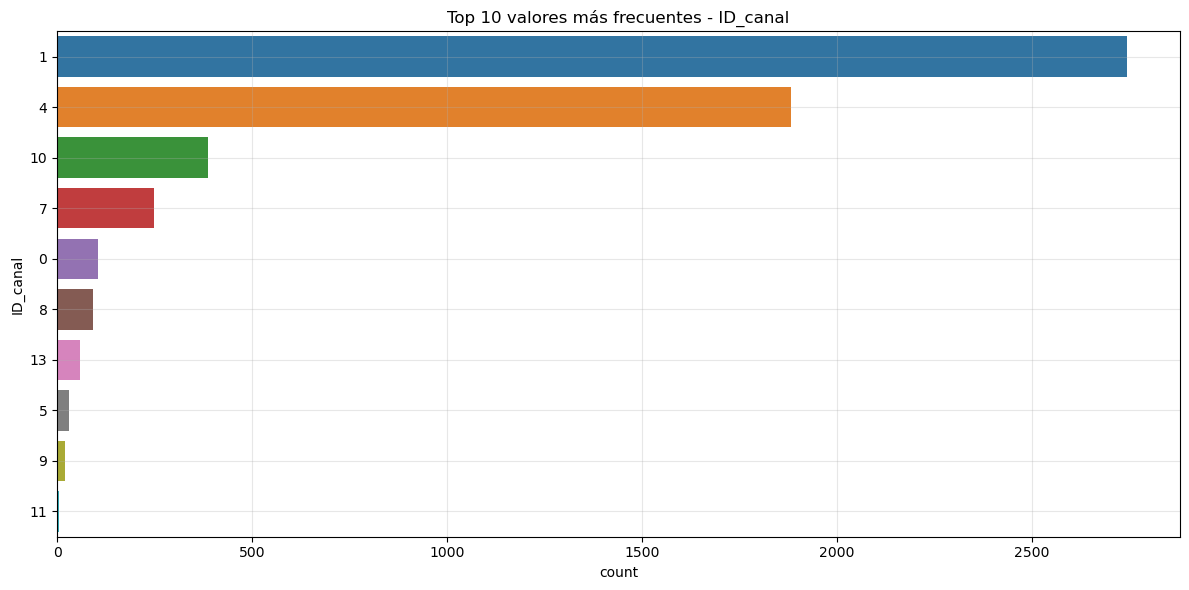


Distribución de ID_estatus_reservaciones:
  - Valores únicos: 7
  - Muchos valores únicos (7). Mostrando los 10 más frecuentes:
9    4797
2     544
3     129
1      57
4      40
8       6
5       2
Name: ID_estatus_reservaciones, dtype: int64


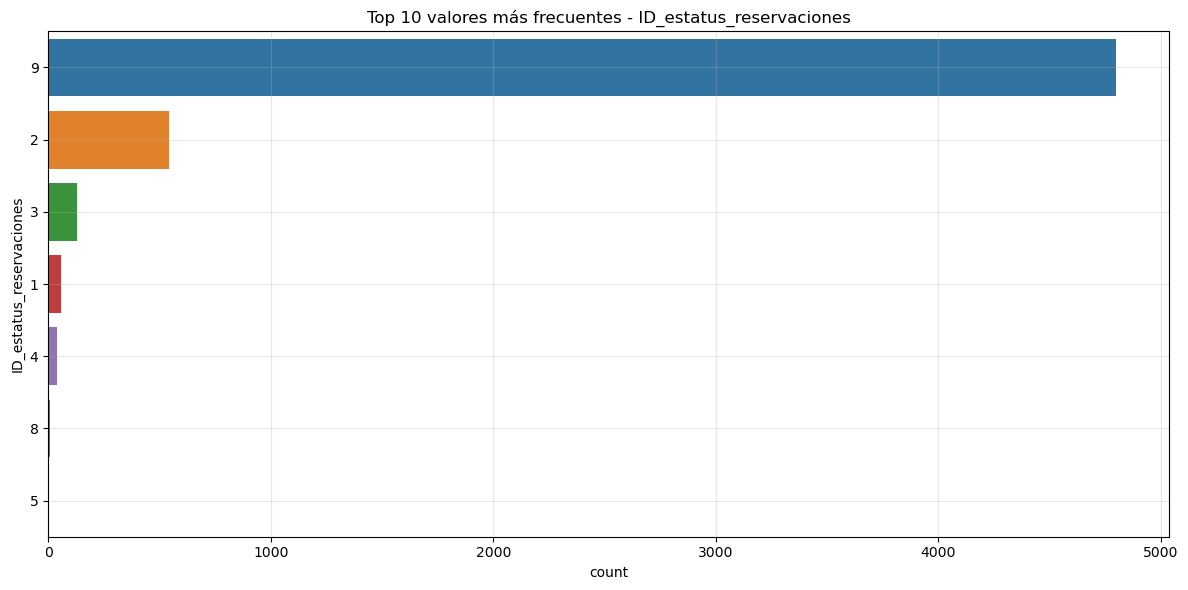

In [29]:

# Seleccionar columnas categóricas para analizar

columnas_categoricas_analizar = ["ID_Agencia", "ID_Programa", "ID_empresa", "ID_Pais_Origen", "ID_Paquete", "ID_Reserva", "ID_Segmento_Comp", "ID_Tipo_Habitacion", "ID_canal", "ID_estatus_reservaciones"]


for col in columnas_categoricas_analizar:
    # Contar valores únicos
    valor_counts = df_analisis[col].value_counts()
    n_unique = len(valor_counts)
    
    print(f"\nDistribución de {col}:")
    print(f"  - Valores únicos: {n_unique}")
    

    print(f"  - Muchos valores únicos ({n_unique}). Mostrando los 10 más frecuentes:")
    print(valor_counts.head(10))
    
    # Gráfico de barras para los 10 valores más frecuentes
    plt.figure(figsize=(12, 6))
    sns.countplot(y=col, data=df_analisis, 
                    order=df_analisis[col].value_counts().head(10).index)
    plt.title(f'Top 10 valores más frecuentes - {col}')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()



# Análisis de variable temporales

In [30]:
# Identificar y convertir columnas de fecha
columnas_fecha_potenciales = [col for col in df_analisis.columns if 'fec' in col.lower() or 'date' in col.lower()]
print(f"Columnas potenciales de fecha detectadas: {len(columnas_fecha_potenciales)}")

fechas_convertidas = []
for col in columnas_fecha_potenciales:
    try:
        if df_analisis[col].dtype != 'datetime64[ns]':
            df_analisis[col] = pd.to_datetime(df_analisis[col], errors='coerce')
            print(f"Columna {col} convertida a datetime")
        fechas_convertidas.append(col)
    except:
        print(f"No se pudo convertir {col} a datetime")

Columnas potenciales de fecha detectadas: 5


### Análisis con la variable FECHA: h_fec_sda_okt

In [31]:
# Seleccionar la primera columna de fecha convertida para el análisis
fecha_analisis = fechas_convertidas[0]

# Eliminar filas con fechas nulas para este análisis
df_fechas = df_analisis.dropna(subset=[fecha_analisis])

print(f"\nAnálisis temporal basado en: {fecha_analisis}")


Análisis temporal basado en: h_fec_sda_ok


In [32]:
# Extraer componentes de fecha
df_fechas['año'] = df_fechas[fecha_analisis].dt.year
df_fechas['mes'] = df_fechas[fecha_analisis].dt.month
df_fechas['dia'] = df_fechas[fecha_analisis].dt.day
df_fechas['dia_semana'] = df_fechas[fecha_analisis].dt.day_name()


Distribución por año:
2019    4322
2020    1252
2021       1
Name: año, dtype: int64


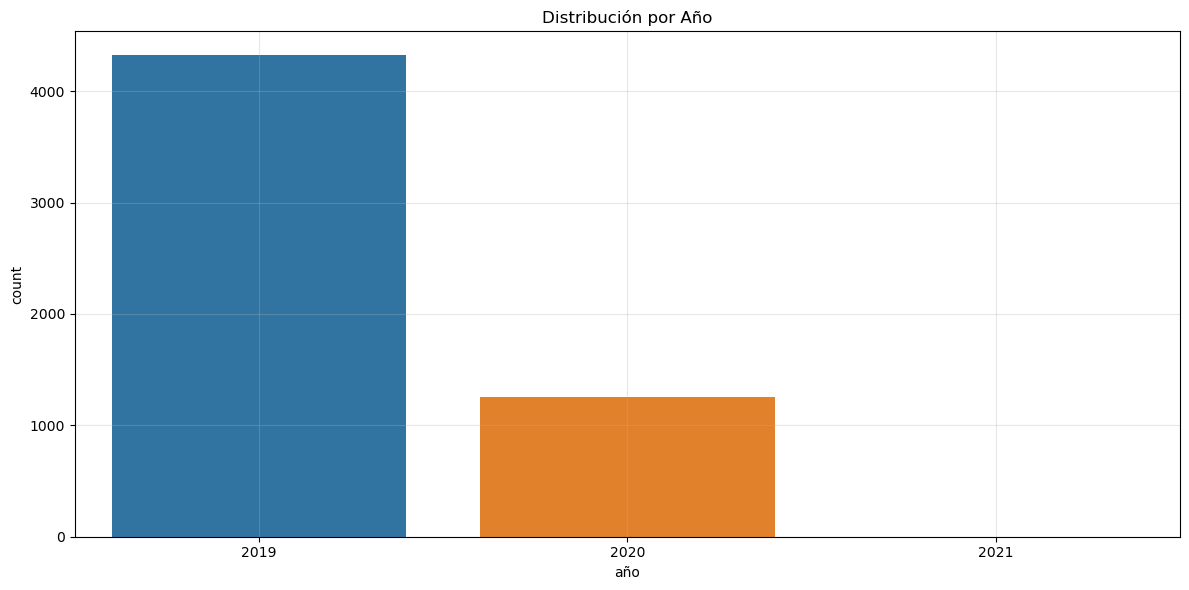

In [33]:
# Análisis por año
print("\nDistribución por año:")
year_counts = df_fechas['año'].value_counts().sort_index()
print(year_counts)

plt.figure(figsize=(12, 6))
sns.countplot(x='año', data=df_fechas, order=sorted(df_fechas['año'].unique()))
plt.title('Distribución por Año')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


Distribución por mes:
1 - Enero         440
2 - Febrero       492
3 - Marzo         776
4 - Abril         367
5 - Mayo          614
6 - Junio         445
7 - Julio         501
8 - Agosto        538
9 - Septiembre    332
10 - Octubre      331
11 - Noviembre    344
12 - Diciembre    395
Name: mes, dtype: int64


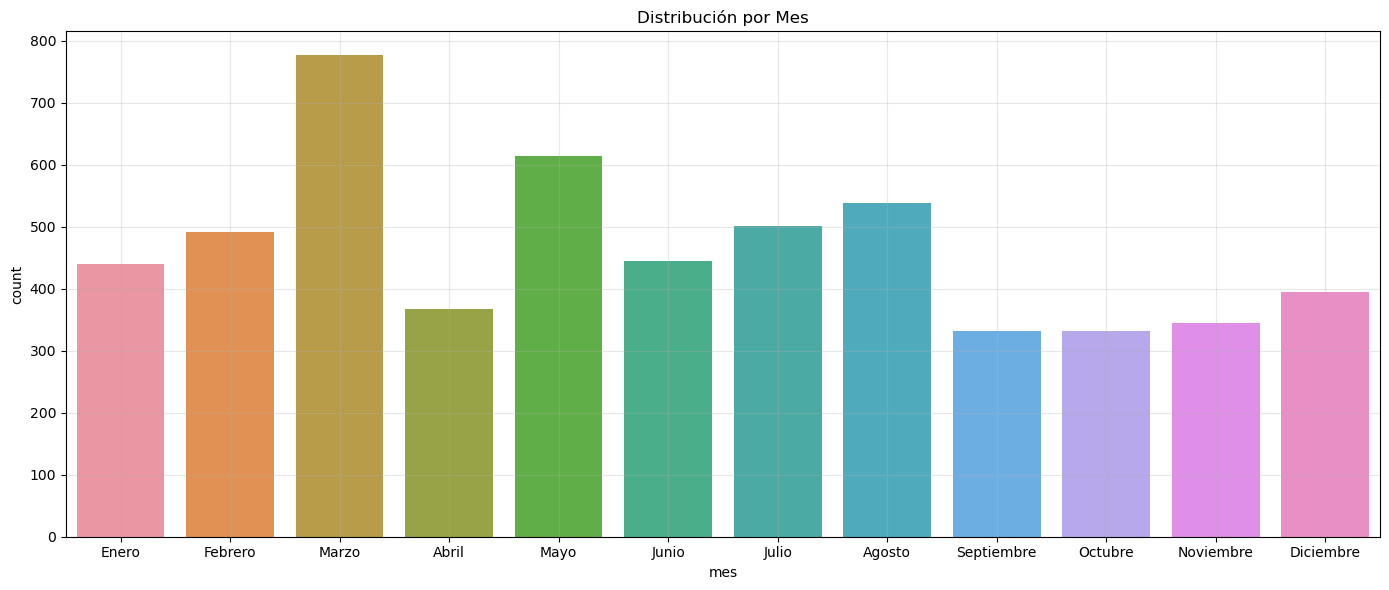

In [34]:
# Análisis por mes
print("\nDistribución por mes:")
month_counts = df_fechas['mes'].value_counts().sort_index()
month_names = {
    1: 'Enero', 2: 'Febrero', 3: 'Marzo', 4: 'Abril', 5: 'Mayo', 6: 'Junio',
    7: 'Julio', 8: 'Agosto', 9: 'Septiembre', 10: 'Octubre', 11: 'Noviembre', 12: 'Diciembre'
}
month_counts.index = month_counts.index.map(lambda x: f"{x} - {month_names.get(x, '')}")
print(month_counts)

plt.figure(figsize=(14, 6))
sns.countplot(x='mes', data=df_fechas, order=sorted(df_fechas['mes'].unique()))
plt.xticks(range(12), [month_names.get(i, i) for i in range(1, 13)])
plt.title('Distribución por Mes')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()



Distribución por día de la semana:
Monday - Lunes            588
Tuesday - Martes          314
Wednesday - Miércoles     558
Thursday - Jueves        1035
Friday - Viernes          843
Saturday - Sábado         833
Sunday - Domingo         1404
Name: dia_semana, dtype: int64


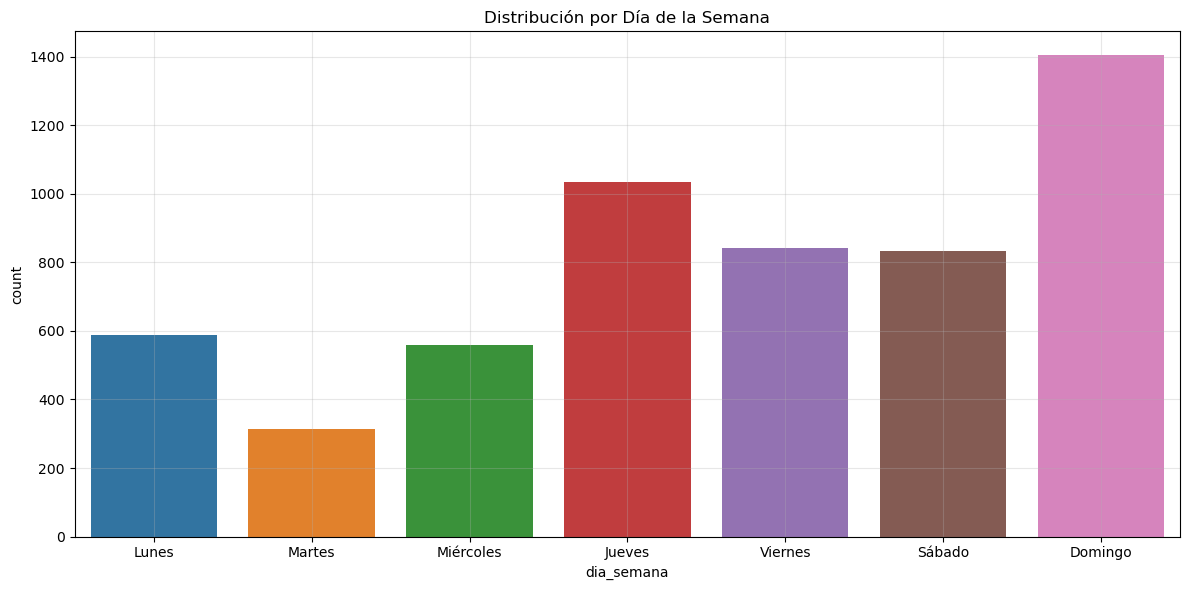

In [35]:
# Análisis por día de la semana
print("\nDistribución por día de la semana:")
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_names = {
    'Monday': 'Lunes', 'Tuesday': 'Martes', 'Wednesday': 'Miércoles', 
    'Thursday': 'Jueves', 'Friday': 'Viernes', 'Saturday': 'Sábado', 'Sunday': 'Domingo'
}

weekday_counts = df_fechas['dia_semana'].value_counts().reindex(weekday_order)
weekday_counts.index = weekday_counts.index.map(lambda x: f"{x} - {weekday_names.get(x, '')}")
print(weekday_counts)

plt.figure(figsize=(12, 6))
sns.countplot(x='dia_semana', data=df_fechas, 
                order=weekday_order)
plt.xticks(range(7), [weekday_names.get(day, day) for day in weekday_order])
plt.title('Distribución por Día de la Semana')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

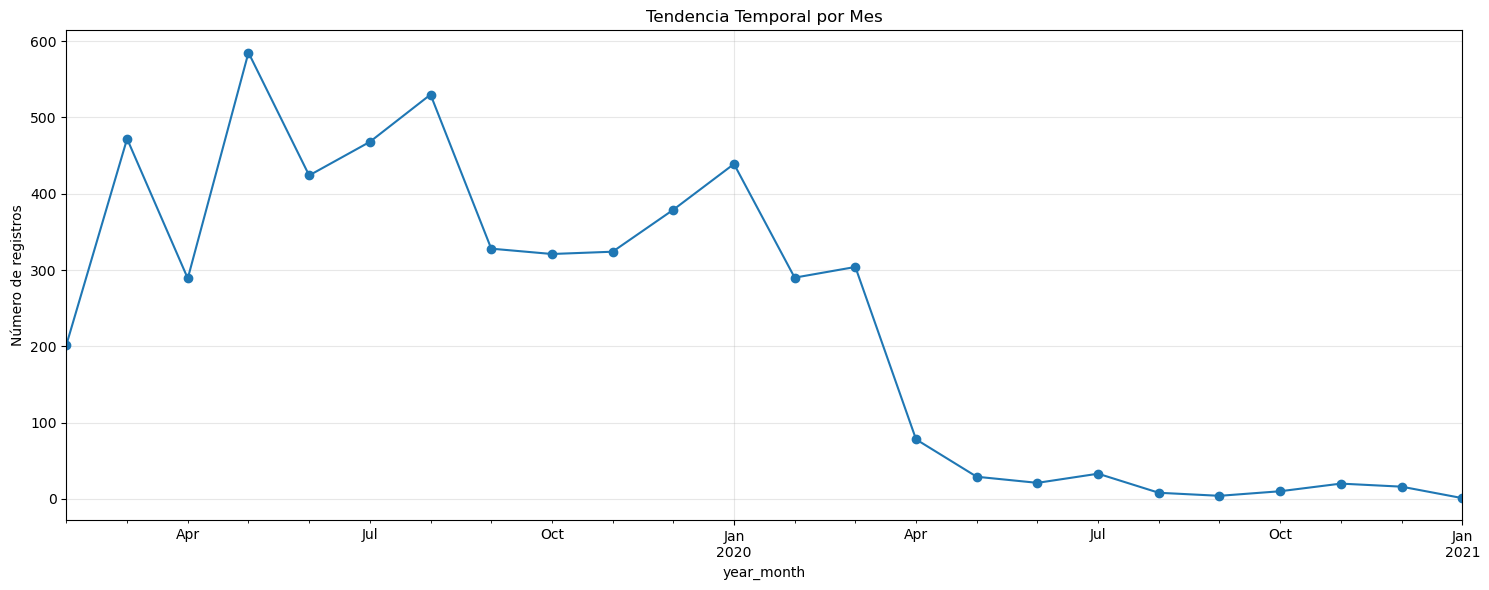

In [36]:
# Tendencia temporal

# Agrupar por año y mes
df_fechas['year_month'] = df_fechas[fecha_analisis].dt.to_period('M')
temporal_trend = df_fechas.groupby('year_month').size()

plt.figure(figsize=(15, 6))
temporal_trend.plot(kind='line', marker='o')
plt.title('Tendencia Temporal por Mes')
plt.ylabel('Número de registros')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

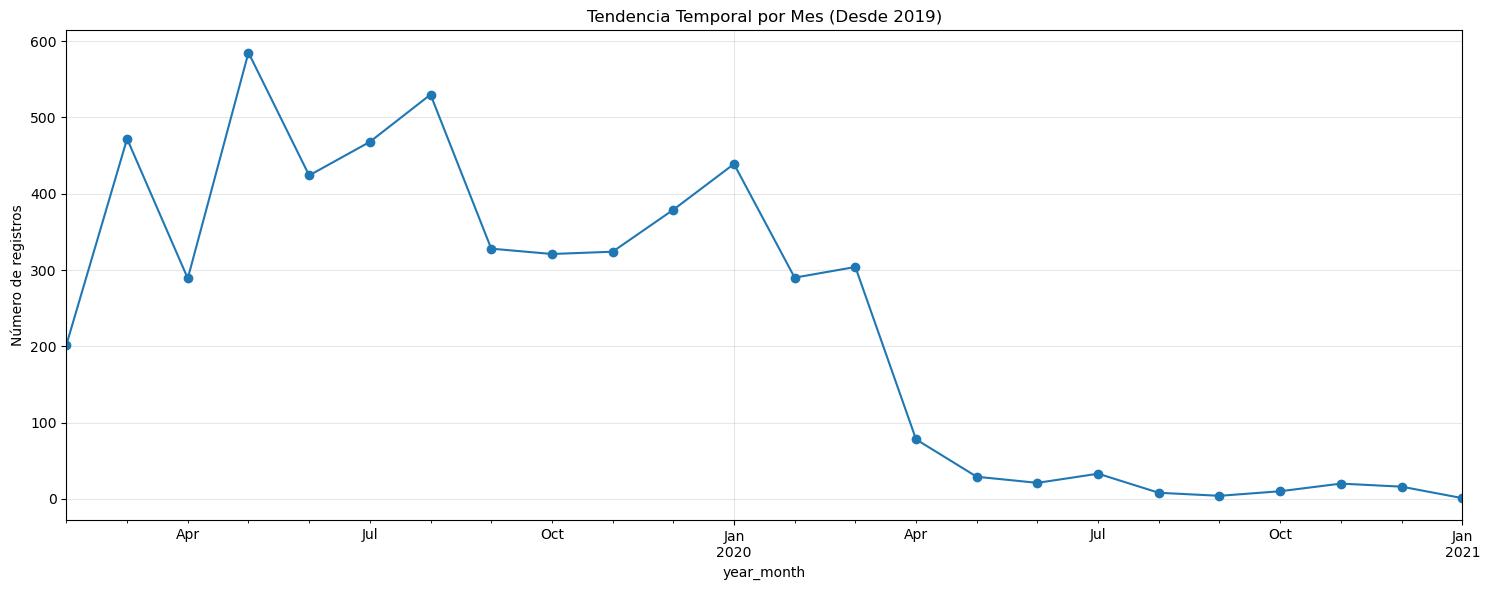

In [37]:
# Visualizar para datos a partir de 2019
df_fechas_filtrado = df_fechas[df_fechas[fecha_analisis].dt.year >= 2019]

# Continuar con el análisis de tendencia temporal
# Agrupar por año y mes
df_fechas_filtrado['year_month'] = df_fechas_filtrado[fecha_analisis].dt.to_period('M')
temporal_trend = df_fechas_filtrado.groupby('year_month').size()

plt.figure(figsize=(15, 6))
temporal_trend.plot(kind='line', marker='o')
plt.title('Tendencia Temporal por Mes (Desde 2019)')
plt.ylabel('Número de registros')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
